## Apantallado

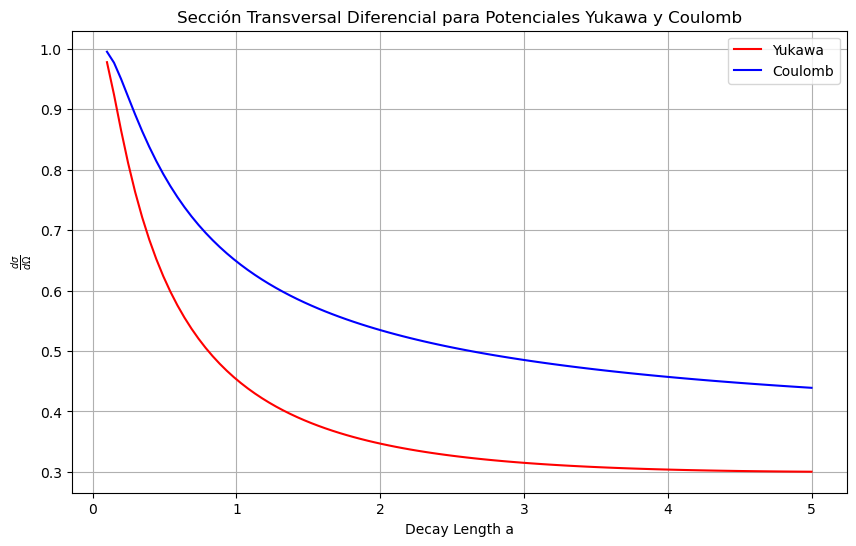

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import newton

# Definir parámetros
Q = 20  # Carga del núcleo grande
q = 2   # Carga del núcleo pequeño
m = 2   # Masa del núcleo pequeño
v0 = 5  # Velocidad inicial
k = q * Q / (4 * np.pi)  # Fuerza del potencial
E = 2  # Energía de colisión
N = 1000  # Número de puntos de datos para la integración

# Función para encontrar el máximo de u
def umax(b, a, E):
    def f(u):
        return 1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E
    return newton(f, b)

# Definir integrandos
def fY(u, b, a, E):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E)

def fC(u, b, a, E):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-1/(u0 * a)) / E)

def df(u, b, a, E):
    return fY(u, b, a, E) - fC(u, b, a, E)

# Definir rango de longitud de decaimiento
a_values = np.linspace(0.1, 5.0, 101)  # Rango de longitud de decaimiento

# Preparar el array para las secciones transversales diferenciales
d_sigma_dOmega_Y = []
d_sigma_dOmega_C = []

# Impact parameter fijo
b = 0.3

# Para cada valor de longitud de decaimiento
for a in a_values:
    u0 = umax(b, a, E)
    u = np.linspace(0.0, u0, N)

    # Evitar división por cero
    u[0] = 0.05
    u[N-1] = u0 - 0.05
    f = df(u, b, a, E)

    # Evaluar la parte no singular
    dphi = simpson(f, x=u)

    # Sección transversal diferencial para el potencial Coulomb
    C = k * np.exp(-1 / (a * u0))
    phiC = np.pi / 2 - np.arctan(C / (2 * b * E))

    # Sección transversal diferencial para el potencial Yukawa
    phiY = phiC + dphi

    # Calcular secciones transversales diferenciales
    d_sigma_dOmega_Y.append(np.sin(phiY))  # Aquí se puede ajustar según el modelo
    d_sigma_dOmega_C.append(np.sin(phiC))  # Sección transversal para Coulomb

# Convertir listas a arrays numpy para facilitar el uso
d_sigma_dOmega_Y = np.array(d_sigma_dOmega_Y)
d_sigma_dOmega_C = np.array(d_sigma_dOmega_C)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(a_values, d_sigma_dOmega_Y, '-r', label="Yukawa")
plt.plot(a_values, d_sigma_dOmega_C, '-b', label="Coulomb")
plt.xlabel("Decay Length a")
plt.ylabel(r"$\frac{d\sigma}{d\Omega}$")
plt.title("Sección Transversal Diferencial para Potenciales Yukawa y Coulomb")
plt.legend(loc='best')
plt.grid()
plt.savefig('d_sigma_dOmega.png', format='png')  # Guardar como PNG
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import newton

# Definir parámetros
Q = 20  # Carga del núcleo grande
q = 2   # Carga del núcleo pequeño
m = 2   # Masa del núcleo pequeño
v0 = 5  # Velocidad inicial
k = q * Q / (4 * np.pi)  # Fuerza del potencial
E = 2  # Energía de colisión
N = 1000  # Número de puntos de datos para la integración

# Función para encontrar el máximo de u
def umax(b, a, E):
    def f(u):
        return 1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E
    return newton(f, b)

# Definir integrandos
def fY(u, b, a, E):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E)

def fC(u, b, a, E):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-1/(u0 * a)) / E)

def df(u, b, a, E):
    return fY(u, b, a, E) - fC(u, b, a, E)

# Definir rango de longitud de decaimiento
a = 1.0  # Longitud de decaimiento fija
b_values = np.linspace(0.0, 3.0, 101)  # Rango de parámetros de impacto

# Preparar el array para las secciones transversales diferenciales
d_sigma_dOmega_Y = []
d_sigma_dOmega_C = []

# Para cada valor de parámetro de impacto
for b in b_values:
    u0 = umax(b, a, E)  # Encontrar u0
    u = np.linspace(0.0, u0, N)

    # Evitar división por cero
    u[0] = 0.05
    u[N-1] = u0 - 0.05
    f = df(u, b, a, E)  # Calcular df

    # Evaluar la parte no singular
    dphi = simpson(f, x=u)

    # Sección transversal diferencial para el potencial Coulomb
    C = k * np.exp(-1 / (a * u0))
    phiC = np.pi / 2 - np.arctan(C / (2 * b * E))

    # Sección transversal diferencial para el potencial Yukawa
    phiY = phiC + dphi

    # Calcular secciones transversales diferenciales
    d_sigma_dOmega_Y.append(np.sin(phiY))  # Ajustar según el modelo
    d_sigma_dOmega_C.append(np.sin(phiC))  # Sección transversal para Coulomb

# Convertir listas a arrays numpy
d_sigma_dOmega_Y = np.array(d_sigma_dOmega_Y)
d_sigma_dOmega_C = np.array(d_sigma_dOmega_C)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(b_values, d_sigma_dOmega_Y, '-r', label="Yukawa")
plt.plot(b_values, d_sigma_dOmega_C, '-b', label="Coulomb")
plt.xlabel("Parámetro de Impacto b")
plt.ylabel(r"$\frac{d\sigma}{d\Omega}$")
plt.title("Sección Transversal Diferencial para Potenciales Yukawa y Coulomb")
plt.legend(loc='best')
plt.grid()

# Guardar la figura como un archivo PNG
plt.savefig('d_sigma_dOmega_vs_b.png', format='png')

# Mostrar la gráfica
plt.show()

/tmp/ipykernel_8823/598520637.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E


RuntimeError: Tolerance of 0.0001 reached. Failed to converge after 1 iterations, value is 0.0001.

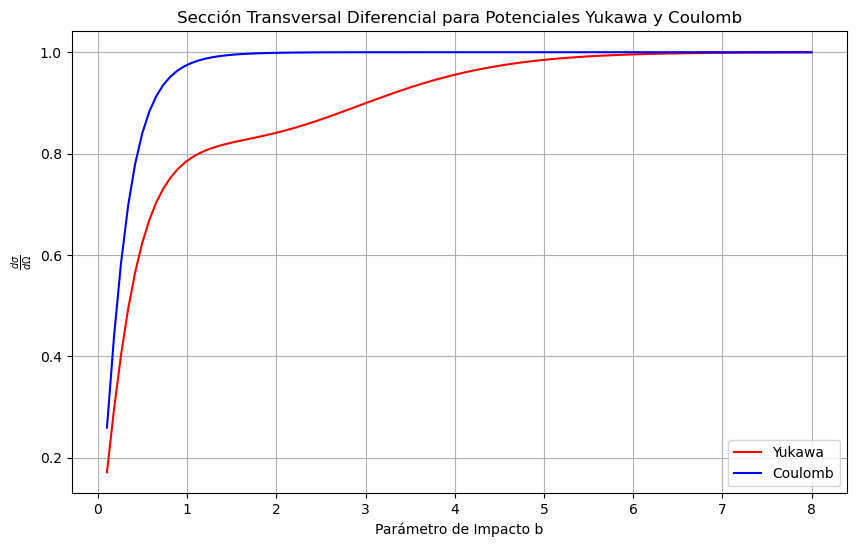

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import newton

# Definir parámetros
Q = 20  # Carga del núcleo grande
q = 2   # Carga del núcleo pequeño
m = 2   # Masa del núcleo pequeño
v0 = 5  # Velocidad inicial
k = q * Q / (4 * np.pi)  # Fuerza del potencial
E = 2  # Energía de colisión
N = 1000  # Número de puntos de datos para la integración

# Función para encontrar el máximo de u
def umax(b, a, E):
    def f(u):
        if u == 0:
            return np.inf  # Evitar división por cero
        return 1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E

    # Usar un rango más amplio para la búsqueda de raíces
    u_initial_guess = b + 1  # Ajustar la conjetura inicial si es necesario
    return newton(f, u_initial_guess)

# Definir integrandos
def fY(u, b, a, E):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-1/(u * a)) / E)

def fC(u, b, a, E):
    return b / np.sqrt(1 - b**2 * u**2 - u * k * np.exp(-1/(u0 * a)) / E)

def df(u, b, a, E):
    return fY(u, b, a, E) - fC(u, b, a, E)

# Definir rango de longitud de decaimiento
a = 1.0  # Longitud de decaimiento fija
b_values = np.linspace(0.1, 8, 101)  # Rango de parámetros de impacto

# Preparar el array para las secciones transversales diferenciales
d_sigma_dOmega_Y = []
d_sigma_dOmega_C = []

# Para cada valor de parámetro de impacto
for b in b_values:
    try:
        u0 = umax(b, a, E)  # Encontrar u0
        u = np.linspace(0.0, u0, N)

        # Evitar división por cero
        u[0] = 0.05
        u[N-1] = u0 - 0.05
        f = df(u, b, a, E)  # Calcular df

        # Evaluar la parte no singular
        dphi = simpson(f, x=u)

        # Sección transversal diferencial para el potencial Coulomb
        C = k * np.exp(-1 / (a * u0))
        phiC = np.pi / 2 - np.arctan(C / (2 * b * E))

        # Sección transversal diferencial para el potencial Yukawa
        phiY = phiC + dphi

        # Calcular secciones transversales diferenciales
        d_sigma_dOmega_Y.append(np.sin(phiY))  # Ajustar según el modelo
        d_sigma_dOmega_C.append(np.sin(phiC))  # Sección transversal para Coulomb
    except RuntimeError as e:
        print(f"Error en b={b}: {e}")
        d_sigma_dOmega_Y.append(0)
        d_sigma_dOmega_C.append(0)

# Convertir listas a arrays numpy
d_sigma_dOmega_Y = np.array(d_sigma_dOmega_Y)
d_sigma_dOmega_C = np.array(d_sigma_dOmega_C)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(b_values, d_sigma_dOmega_Y, '-r', label="Yukawa")
plt.plot(b_values, d_sigma_dOmega_C, '-b', label="Coulomb")
plt.xlabel("Parámetro de Impacto b")
plt.ylabel(r"$\frac{d\sigma}{d\Omega}$")
plt.title("Sección Transversal Diferencial para Potenciales Yukawa y Coulomb")
plt.legend(loc='best')
plt.grid()

# Guardar la figura como un archivo PNG
plt.savefig('d_sigma_dOmega_vs_b.png', format='png')

# Mostrar la gráfica
plt.show()
